# Kmeans cluster Analysis of Mumbai locations

In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


Start where we finished in the last lesson, with data imported and filtered.

In [2]:

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


df = pd.read_csv("C:\\Users\\krish\\Downloads\\MPR sem 5- locationdatasetmpr.csv")
df.tail(5)


KeyboardInterrupt



1     9
3     5
10    4
9     3
8     3
12    3
14    2
17    2
5     2
4     2
11    2
2     2
26    1
20    1
28    1
21    1
7     1
13    1
38    1
16    1
Name: Grand Total, dtype: int64


Text(0.5, 1.0, 'frequency count')

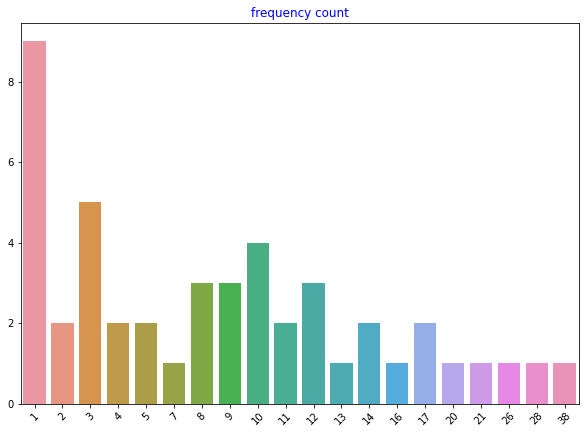

In [9]:

top = df['Grand Total'].value_counts()
print(top)
plt.figure(figsize=(10,7))
sns.barplot(x=top.index,y=top.values)
plt.xticks(rotation=45)
plt.title('frequency count',color = 'blue')

In [10]:
df.head()

,location,Grand Total
0,azad maidan,1
1,bandra,17
2,bhoiwada,2
3,bkc,10
4,borivali,11


How clean is this data? Check for outliers using box plots. We will concentrate on columns with fewer outliers (although you could clean out the outliers). Boxplots can show the range of the data and will help choose which columns to use. Note, Boxplots do not show variance, an important element of good clusterable data (https://stats.stackexchange.com/questions/91536/deduce-variance-from-boxplot)

<AxesSubplot:xlabel='Grand Total'>

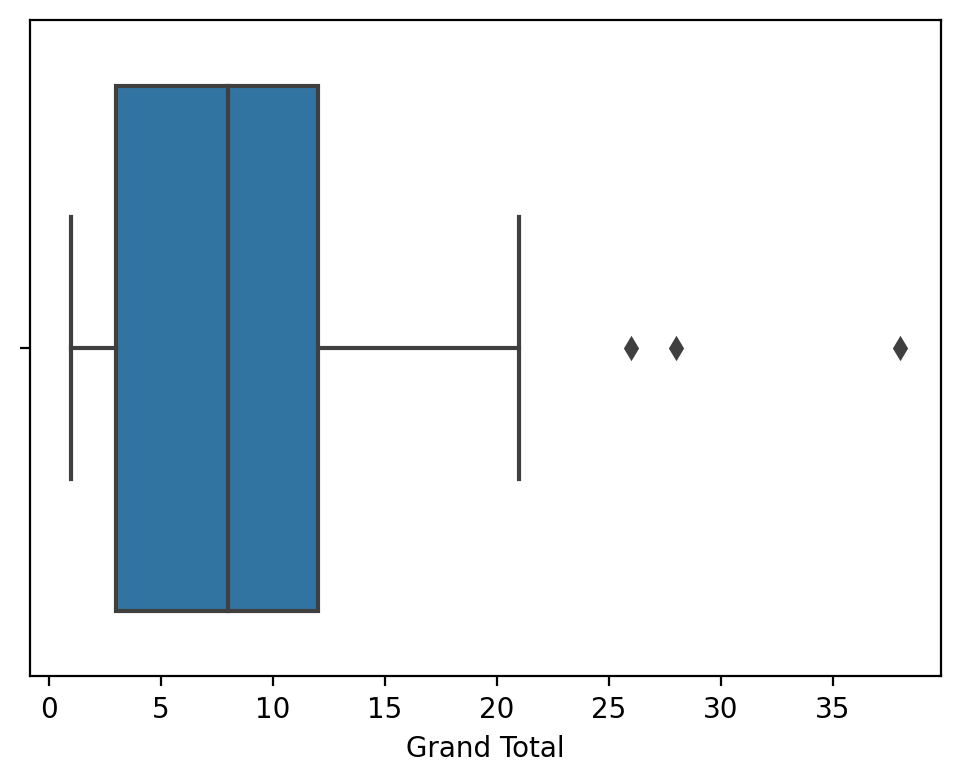

In [12]:
plt.figure(figsize=(20,20), dpi=200)

plt.subplot(4,3,1)
sns.boxplot(x = 'Grand Total', data = df)

In [24]:

from sklearn.cluster import KMeans

nclusters = 4
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed).fit(df['Grand Total'].to_numpy().reshape(-1 ,1))
km.fit(df['Grand Total'].to_numpy().reshape(-1 ,1 ))

# Predict the cluster for each data point

y_cluster_kmeans = km.predict(df['Grand Total'].to_numpy().reshape(-1, 1))
y_cluster_kmeans

array([1, 0, 1, 3, 3, 1, 2, 1, 1, 1, 2, 3, 1, 1, 3, 1, 0, 3, 1, 3, 1, 3,
       1, 1, 0, 1, 3, 1, 0, 1, 3, 0, 2, 1, 3, 3, 1, 0, 3, 3, 0, 3, 1, 3,
       3, 1, 3])

In [37]:
df['predicted'] = y_cluster_kmeans.tolist()

In [38]:
df.head()

,location,Grand Total,predicted
0,azad maidan,1,1
1,bandra,17,0
2,bhoiwada,2,1
3,bkc,10,3
4,borivali,11,3


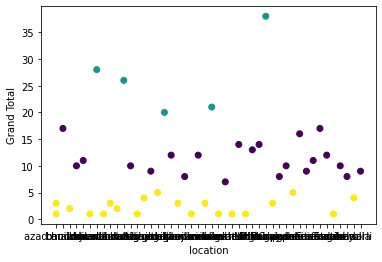

In [39]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3)
kmeans.fit(df['Grand Total'].to_numpy().reshape(-1 , 1))
labels = kmeans.predict(df['Grand Total'].to_numpy().reshape(-1 , 1))
plt.scatter(df['location'],df['Grand Total'],c = labels)
plt.xlabel('location')
plt.ylabel('Grand Total')
plt.show()

In [40]:
df.to_csv('kmeans_mpr.csv')

In [45]:
import numpy as np ; 

In [46]:
conditions = [
    (df['predicted'] == 0),
    (df['predicted'] == 1),
    (df['predicted'] == 2),
    (df['predicted'] == 3)
    ]

# create a list of the values we want to assign for each condition
values = ['High', 'Low', 'Extreme', 'Medium']

# create a new column and use np.select to assign values to it using our lists as arguments
df['Traffic Type'] = np.select(conditions, values)

# display updated DataFrame
df.head()

,location,Grand Total,predicted,Traffic Type
0,azad maidan,1,1,Low
1,bandra,17,0,High
2,bhoiwada,2,1,Low
3,bkc,10,3,Medium
4,borivali,11,3,Medium


In [47]:
df.to_csv('Final_kmeans_mpr.csv')